In [1]:
import sys
sys.path.append('../../dopedefects')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iterative

In [2]:
import seaborn as sns
sns.set_context("talk")
my_color = ["maroon", "navy", "grey"]
sns.set_palette(my_color)

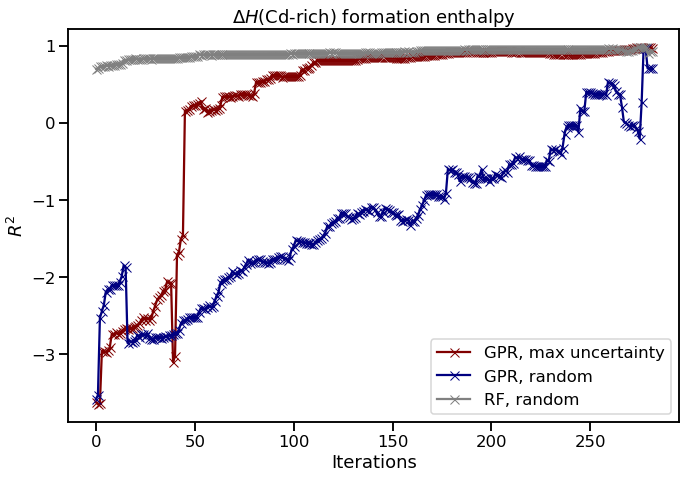

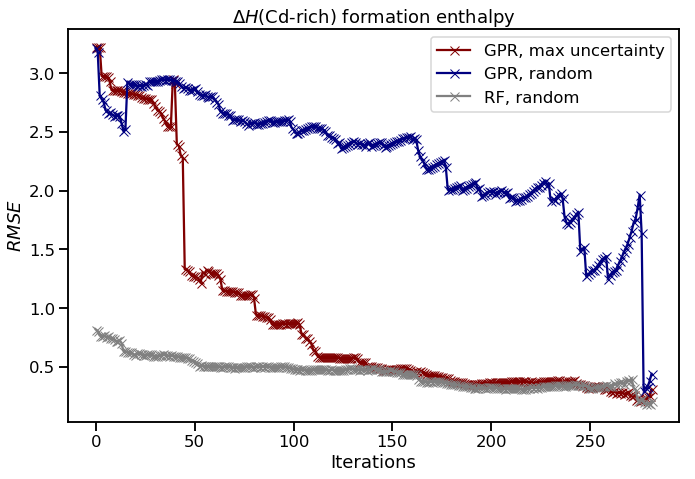

In [9]:
df = pd.read_csv('../../../local_dd/data_CdTe.csv')
yHcd = df["?H(Cd-rich)"]
yp3p2 = df["(+3/+2)"]
yp10 = df["(+1/0)"]
y0m1 = df["(0/-1)"]
Xbase = df[["Period", "Group", "Site","# Cd Neighbors", "# Te Neighbors"]]
Xelemental = df.iloc[:,17:26]
Xdefect = df.iloc[:,28:]
X1 = Xbase.join(Xelemental)
X2 = Xbase.join(Xdefect)
X3 = X1.join(Xdefect)

y = yHcd.values[:]
X = X3.values

test_size = 0.9
y_r2, y_rmse = iterative.iter_model(X, y, test_size, "GPR_std")
y_r2_r, y_rmse_r = iterative.iter_model(X, y, test_size, "GPR_rand")
y_r2_rf, y_rmse_rf = iterative.iter_model(X, y, test_size, "RF_rand")

plt.figure(figsize=(10,7))
plt.plot(y_r2, 'x-', label = "GPR, max uncertainty")
plt.plot(y_r2_r, 'x-', label = "GPR, random")
plt.plot(y_r2_rf, 'x-', label = "RF, random")
plt.ylabel('$R^2$')
plt.xlabel("Iterations")
plt.legend()
plt.title("$\Delta H$" + "(Cd-rich) formation enthalpy")
plt.tight_layout()
plt.savefig("./delH(Cd)0.9_iter_r2_X3.jpg", dpi=400)

plt.figure(figsize=(10,7))
plt.plot(y_rmse, 'x-', label = "GPR, max uncertainty")
plt.plot(y_rmse_r, 'x-', label = "GPR, random")
plt.plot(y_rmse_rf, 'x-', label = "RF, random")
plt.ylabel('$RMSE$')
plt.xlabel("Iterations")
plt.legend()
plt.title("$\Delta H$" + "(Cd-rich) formation enthalpy")
plt.tight_layout()
plt.savefig("./delH(Cd)0.9_iter_rmse_X3.jpg", dpi=400)